# Проект: Исследование стартапов

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

#### Содержимое проекта

1. Знакомство с данными: загрузка и первичная предобработка
2. Предобработка данных, предварительное исследование
3. Исследовательский анализ объединённых таблиц
4. Итоговый вывод и рекомендации



#### Цель проекта
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.1 MB/s eta 0:00:01


In [2]:
!pip install numpy==1.21.0

     |████████████████████████████████| 15.7 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1


In [3]:
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

pd.reset_option('display.max_columns')



* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

#### Загружаем данные по проекту

In [4]:
acquisition_df = pd.read_csv('https://.csv')

In [5]:
company_and_rounds_df = pd.read_csv('https://.csv')

In [6]:
degrees_df = pd.read_csv('https://.csv')

In [7]:
education_df = pd.read_csv('https://.csv')

In [8]:
fund_df = pd.read_csv('https://.csv')

In [9]:
investment_df = pd.read_csv('https://.csv')

In [10]:
people_df = pd.read_csv('https://.csv')

#### Выведем информацию по каждому датасету

In [11]:
acquisition_df.info()
# Выводим первые строки датафрейма на экран
acquisition_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [12]:
company_and_rounds_df.info()
company_and_rounds_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
degrees_df.info()
degrees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
education_df.info()
education_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [15]:
fund_df.info()
fund_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [16]:
investment_df.info()
investment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [17]:
people_df.info()
people_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Как видно самый большой датасет company_and_rounds_df содержит информацию о компаниях и раундах финансирования, самый маленький acquisition_df содержит информацию о покупках одними компаниями других компаний.
- `acquisition_df`- содержит информацию о покупках одними компаниями других компаний, 6 столбцов, 9407 строк, пропуски присутствуют в двух столбцах term_code (варианты рачсёта) и acquired_at (дата сделки). По дате сделки пропусков немного, я думаю с ними можно ничего не делать, это будет не критично, по вариантам расчёта пропуски можно будет заменить на "нет данных".
- `company_and_rounds_df`- содержит информацию о компаниях и раундах финансирования, 22 столбца и 217774 строк, во всех столбцах так или иначе присутствуют пропуски, в тех столбцах где их количество не значительно я думаю пропуски можно удалить, по остальным "category code" (категория области деятельности компании) заменим на "нет данных",  "founded  at" (дата инвестирования) менять пропуски не будем нам нужно будет преобразовывать тип данных, "closed  at" (дата закрытия компании") здесь очень много пропусков, но это логично так остальные компании действующие, соответственно у них нет даты закрытия, поэтому тут мы тоже с пропусками ничего не делаем. "domain" (официальный сайт компании), данные пропуски в принципе тоже вполне объяснимы, далеко не все компании указывают сайт(а есть и такие у которых его нет), поэтому здесь мы тоже заменим пропуски на "нет данных". "network  username" (ник компании в сети) тоже заменим на "нет данных". "country  code" (код страны компании) тут можно тоже можно указать нет данных, а можно в принципе ничего не делать. Столбцы в котрых присутствует информация с 217472 строк пропуски можно удалить их не много. Настораживают два столбца "company  ID" и "company  id" оба идентификаторы компаний, как мне кажется дублирующие друг друга, но тем не менее дополнительной информации нет поэтому оба столбца оставим, второй столбец переименуем т.к. нам нужно названия всех столбцов в данном датасете привести к единому стилю snake case. Что касается солбцов в которых 52928 строк, то я бы с ними по факту ничего не делал, по данным столбцам заполнение пропусков в дальнейшем может только добавить дополнительной фильтрации.
- `degrees_df` - содержит информацию о типе образования сотрудника, 4 столбца 109610 строк, пропуски в "degree_type" (тип образования) и "subject" (специальность) зменим на "нет данных".
- `education_df` - содержит информацию об образовании сотрудника, 4 столбца и 109610 строк, сразу напрашивается объединение с предыдущим датасетом, в дальнейшем так и сделаем, пропуски в instituition (название учебного заведения) и graduated_at (дата получения образоваия) пропуски оставляем как есть для преобразования к нужному типу данных.
- `fund_df` - содержит информацию о фондах, 9 столбцов, 11652 строки. В "name" (название фонда) 2 пропуска, можно с ними ничего не делать, не критично. "founded_at " (дата создания фонда) столбец с подобным названием присутствует в `company_and_rounds_df`, не совсем понятно одинаковые ли это данные, по этому столбцу и будем присоединять датасеты, пропуски заменять ничем не будем, как видим в данном датасете многие столбцы дублируют столбцы из датасета `company_and_rounds_df`. С пропусками в данном датасете ничего делать не будем по факту их не останется после присоединения к датасету `company_and_rounds_df` (я так полагаю инфрмация в датасетах практически одинаковая).
- `investment_df` - содержит информацию о раундах инвестирования, 4 столбца, 61403 строк, пропуски отсутствуют.
- `people_df` - содержит информацию о сотрудниках, 5 столбцов, 226709 строк. ПРопуски присутствуют в столбцах "company_id", с ними по факту можно ничего не делать по данному столбцу будем присоединять датасет к `company_and_rounds_df`, "network_username", пропуски можно поменять на нет данных.
    

In [18]:
# Выводим количество пропущенных строк в датафрейме
acquisition_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [19]:
# Подсчитываем процент строк с пропусками
acquisition_df.isna().sum() / len(acquisition_df) * 100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

In [20]:
acquisition_df['term_code'] = acquisition_df['term_code'].fillna('нет данных') # меняем пропуски в столбце варианты расчёта  на значение нет данных

In [21]:
# Подсчитываем процент строк с пропусками
acquisition_df.isna().sum() / len(acquisition_df) * 100

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.000000
price_amount            0.000000
acquired_at             0.308281
dtype: float64

In [22]:
# Приводим столбцы к единому стилю snake case в датасете company_and_rounds_df используем rename
rename_map = {
    'company  ID': 'company_id',
    'name': 'name',
    'category  code': 'category_code',
    'status': 'status',
    'founded  at': 'founded_at',
    'closed  at': 'closed_at',
    'JP sales': 'jp_sales',
    'domain': 'domain',
    'network  username': 'network_username',
    'country  code': 'country_code',
    'investment  rounds': 'investment_rounds',
    'funding  rounds': 'funding_rounds',
    'funding  total': 'funding_total',
    'milestones': 'milestones',
    'funding  round  id': 'funding_round_id',
    'company  id': 'company_id_2',
    'funded  at': 'funded_at',
    'funding  round  type': 'funding_round_type',
    'raised  amount': 'raised_amount',
    'pre  money  valuation': 'pre_money_valuation',
    'participants': 'participants',
    'is  first  round':'is_first_round',
    'is  last  round': 'is_last_round'
}

company_and_rounds_df.rename(columns=rename_map, inplace=True)  

In [23]:
# Проверяем название столбцов
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Приводим столбцы с датами к соответствующему типу данных 'datetime64'.

In [24]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             9407 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [25]:
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors = 'coerce')

In [26]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             9407 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [27]:
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors = 'coerce')
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'], errors = 'coerce')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors = 'coerce')

In [28]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [29]:
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors = 'coerce')

In [30]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [31]:
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'], errors = 'coerce')

In [32]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


Проверим датасеты на дубликаты, подсчитаем сумму строк с явным дублированием для каждого датасета отдельно

In [33]:
acquisition_df.duplicated().sum() 

0

In [34]:
company_and_rounds_df.duplicated().sum() 

0

In [35]:
degrees_df.duplicated().sum() 

0

In [36]:
education_df.duplicated().sum() 

0

In [37]:
fund_df.duplicated().sum() 

0

In [38]:
investment_df.duplicated().sum()

0

In [39]:
people_df.duplicated().sum()

0

В каждом из датасетов явные дубликаты отсутствуют.

Проверим датасеты на неявные дубликаты, предлагаю проверить по столбцам id, по идее там все данные должны быть разные, в остальных столбцах могут повторяться значения, т.к. одна и та же компания может совершать несколько операций или же несколько компаний могут совершать операции в одну и ту же дату, поэтому такие неявные дубликаты это норм.

In [40]:
# Проверяем неявные дубликаты в датафрейме df
acquisition_df.duplicated(subset='id').sum()

0

In [41]:
company_and_rounds_df.duplicated(subset='company_id').sum()

21220

Получается 20919 неявных дубликатов по id компании, но это как видно из датасета company_and_rounds_df нормально, одна и таже компания совершает несколько разных операций, и соответственно информация по каждой отдельной операции заносится отдельно, отсюда и происходит дублирование по id

In [42]:
degrees_df.duplicated(subset='id').sum()

0

In [43]:
education_df.duplicated(subset='id').sum()

0

In [44]:
fund_df.duplicated(subset='id').sum()

0

In [45]:
investment_df.duplicated(subset='id').sum()

0

In [46]:
people_df.duplicated(subset='id').sum()

1

Присутствует один дубликат по id сотрудника, думаю лучше будет его просто удалить

In [47]:
people_df =people_df.drop_duplicates(subset='id') # удаляем дубликат по столбцу id

In [48]:
people_df.duplicated(subset='id').sum()

0

Явные дубликаты в датасетах отсутствуют, что касается неявных то они либо объяснимы либо их нет, один удалили.

In [49]:
company_and_rounds_df['year'] = company_and_rounds_df.loc[:, 'funded_at'].dt.year
company_and_rounds_df['year'] = company_and_rounds_df['year'].fillna(0) 
company_and_rounds_df['year'] = company_and_rounds_df['year'].astype('int64')
display(company_and_rounds_df.head())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0


Данные нормализованы, приведены к необходимым типам данных, пропуски там где это необходимо отработаны, работа по явным и неявным дубликатам так же проведена. Предполагаю, что данных достаточно для выполнения проекта.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [50]:
pd.options.display.float_format ='{:,.3f}'.format
pd.set_option('display.max_colwidth', None)
company_and_rounds_df['year'] = company_and_rounds_df.loc[:, 'funded_at'].dt.year
company_and_rounds_df['year'] = company_and_rounds_df['year'].fillna(0) 
company_and_rounds_df['year'] = company_and_rounds_df['year'].astype('int64')
pivot = company_and_rounds_df.pivot_table(values=['raised_amount', 'funding_rounds'], index = 'year', aggfunc={'raised_amount':['sum', 'mean'], 'funding_rounds': 'count'})
display(pivot.tail(15))

funding_rounds  raised_amount                   
              count           mean                sum
year                                                 
1999             76  7,420,241.711    563,938,370.000
2000            125 11,485,509.144  1,435,688,643.000
2001             95  8,761,518.958    841,105,820.000
2002            115  7,836,195.931    908,998,728.000
2003            154  5,725,049.591    910,282,885.000
2004            286  7,593,645.519  2,209,750,846.000
2005           1624  9,324,876.544 15,227,523,397.000
2006           2409  8,404,267.403 20,472,795,394.000
2007           3220  8,931,094.375 29,285,058,454.000
2008           3735 10,191,804.046 38,463,868,468.000
2009           4112  8,794,642.651 36,506,561,644.000
2010           6194  7,749,651.654 48,210,582,942.000
2011           9162  7,246,438.922 66,696,223,841.000
2012           9956  6,412,032.625 63,927,965,271.000
2013          11042  8,467,284.067 93,749,769,191.000

In [51]:
pivot_2 = company_and_rounds_df.pivot_table(values='raised_amount',  index = 'year',  aggfunc='mean')
display(pivot_2.tail(15))

,raised_amount
year,
1999,"7,420,241.711"
2000,"11,485,509.144"
2001,"8,761,518.958"
2002,"7,836,195.931"
2003,"5,725,049.591"
2004,"7,593,645.519"
2005,"9,324,876.544"
2006,"8,404,267.403"
2007,"8,931,094.375"


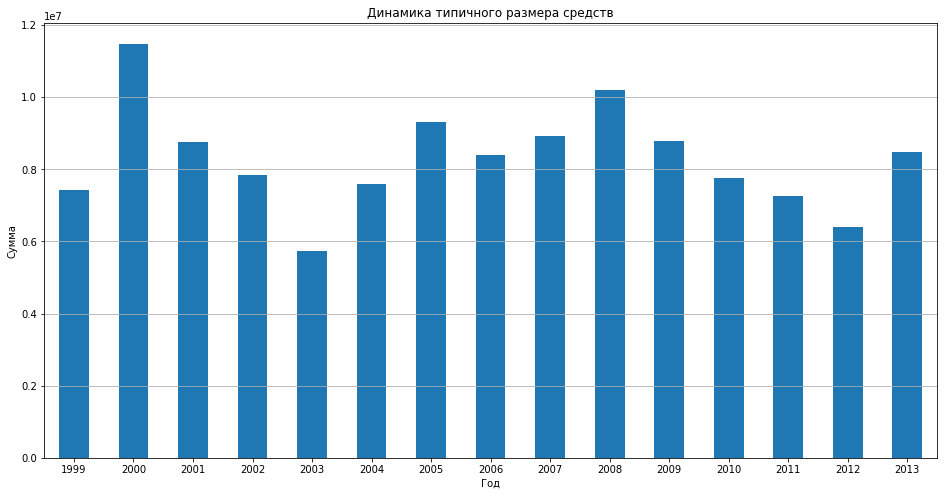

In [52]:
# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
pivot_2.tail(15).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               figsize=(16, 8),
               title=f'Динамика типичного размера средств'
)

# Настраиваем оформление графика
plt.xlabel('Год')
plt.ylabel('Сумма')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Наиболее максимальный размер собранных в рамках одного раунда средств был в 2000 году.
В 2013 году была наиболее максимальное количество раундов (11042), а что касается выделяемых в рамках каждого раунда средств составили 8,123,521.669, т.е. в 2013 году наблюдался рост. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Объединять датасеты в один будем по идентификатор сотрудника (id), для этого переименуем столбцы в датасете education_df, чтобы объединить данные по одинаковому столбцу.

In [53]:
rename_map = {
    'id': 'id_education',
    'person_id': 'id'
}

education_df.rename(columns=rename_map, inplace=True) 

In [54]:
# Соединяем данные в единый датафрейм df
df_people_2 = people_df.merge(education_df, on='id', how='left')
df_people_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267693 entries, 0 to 267692
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                267693 non-null  int64         
 1   first_name        267688 non-null  object        
 2   last_name         267692 non-null  object        
 3   company_id        44788 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   instituition      109002 non-null  object        
 7   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 18.4+ MB


In [55]:
display(df_people_2)

,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at
0,10,Mark,Zuckerberg,5.000,NaN,"2,415.000",Harvard University,NaT
1,100,Peter,Lester,27.000,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.000,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526.000",NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT
267689,174088,Dr. Ray,Woods,"188,200.000",network,"25,958.000",Sydney University Medical School,1982-01-01
267690,118386,Ricardo,Durand,"143,419.000",itechsocialnet,"18,871.000",ESCS,2004-01-01
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT


In [56]:
df_people_2['company_count_category'] = pd.cut(df_people_2.groupby('company_id')['id'].count(), bins=[0, 10, 50, 150, 5000], labels=["маленькая", "средняя", "большая", "крупная"])
display(df_people_2)

,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,company_count_category
0,10,Mark,Zuckerberg,5.000,NaN,"2,415.000",Harvard University,NaT,NaN
1,100,Peter,Lester,27.000,NaN,NaN,NaN,NaT,маленькая
2,1000,Dr. Steven,E. Saunders,292.000,NaN,NaN,NaN,NaT,маленькая
3,10000,Neil,Capel,"2,526.000",NaN,NaN,NaN,NaT,маленькая
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,средняя
...,...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN
267689,174088,Dr. Ray,Woods,"188,200.000",network,"25,958.000",Sydney University Medical School,1982-01-01,NaN
267690,118386,Ricardo,Durand,"143,419.000",itechsocialnet,"18,871.000",ESCS,2004-01-01,NaN
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN


In [57]:
df_people_2['instituition'].isna().sum()

158691

In [58]:
df_people_2.groupby('company_id')['company_id'].count().head(100)

company_id
1.000       3
2.000       1
3.000       5
4.000      18
5.000      84
           ..
119.000     1
120.000     2
121.000     3
125.000     2
126.000     1
Name: company_id, Length: 100, dtype: int64

In [59]:
#Считаю количество сотрудников в компаниях
pd.options.display.max_rows = 100
display(df_people_2['company_id'].value_counts().head(100))

59.000         376
29.000         221
1,242.000      192
231,067.000    111
4,175.000       89
5.000           84
499.000         80
4,715.000       73
317.000         71
494.000         70
1,654.000       66
12.000          64
20.000          59
351.000         52
3,246.000       46
2,680.000       44
28.000          44
5,744.000       43
176.000         42
1,915.000       39
9,054.000       39
28,530.000      35
25,526.000      35
71.000          34
355.000         34
250.000         30
242,043.000     30
333.000         29
18,661.000      29
42.000          28
35,739.000      27
3,245.000       27
1,444.000       27
4,453.000       26
479.000         26
69,266.000      25
62.000          25
537.000         25
18,213.000      25
5,674.000       24
174,754.000     24
267,752.000     23
590.000         22
500.000         22
2,537.000       22
3,447.000       21
11,391.000      20
429.000         20
283.000         20
823.000         20
8,750.000       20
476.000         20
196,887.000 

In [60]:
# Считаем количество компаний по количеству сотрудников
count_people = df_people_2['company_id'].value_counts()
count_people.value_counts()

1      14149
2       4735
3       1857
4        831
5        447
6        259
7        161
8        115
9         86
11        52
10        51
13        26
12        25
18        16
15        14
14        12
16        12
19        10
20         9
17         8
25         4
27         3
22         3
44         2
39         2
24         2
35         2
30         2
34         2
26         2
29         2
28         1
221        1
59         1
43         1
46         1
71         1
42         1
89         1
73         1
376        1
64         1
23         1
70         1
21         1
84         1
52         1
66         1
192        1
80         1
111        1
Name: company_id, dtype: int64

Наибольшее количество сотрудников равно 1, можно разделить в принципе на микро 1, 2 сотрудника, маленькие стартапы до 10 включительно, средние до 25, большие все остальные

In [61]:
display(df_people_2)

,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,company_count_category
0,10,Mark,Zuckerberg,5.000,NaN,"2,415.000",Harvard University,NaT,NaN
1,100,Peter,Lester,27.000,NaN,NaN,NaN,NaT,маленькая
2,1000,Dr. Steven,E. Saunders,292.000,NaN,NaN,NaN,NaT,маленькая
3,10000,Neil,Capel,"2,526.000",NaN,NaN,NaN,NaT,маленькая
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,средняя
...,...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN
267689,174088,Dr. Ray,Woods,"188,200.000",network,"25,958.000",Sydney University Medical School,1982-01-01,NaN
267690,118386,Ricardo,Durand,"143,419.000",itechsocialnet,"18,871.000",ESCS,2004-01-01,NaN
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN


In [62]:
# За основу дополнительной таблицы возьмем столбец company_id и количество сотрудников из основной таблицы
company_people_5 = df_people_2.groupby('company_id')['id'].count()
display(company_people_5)

company_id
1.000           3
2.000           1
3.000           5
4.000          18
5.000          84
               ..
285,897.000     2
285,953.000     1
285,972.000     2
285,996.000     1
286,091.000     7
Name: id, Length: 22921, dtype: int64

In [63]:
# Создаем таблицу где будем вести основные расчёты и группировку
company_people_5_df= company_people_5.reset_index()
display(company_people_5_df)

,company_id,id
0,1.000,3
1,2.000,1
2,3.000,5
3,4.000,18
4,5.000,84
...,...,...
22916,"285,897.000",2
22917,"285,953.000",1
22918,"285,972.000",2
22919,"285,996.000",1


In [64]:
#Переименуем столбец 'id'
rename_map = {'id':'count_people_2'}
company_people_5_df.rename(columns=rename_map, inplace=True) 
display(company_people_5_df)

,company_id,count_people_2
0,1.000,3
1,2.000,1
2,3.000,5
3,4.000,18
4,5.000,84
...,...,...
22916,"285,897.000",2
22917,"285,953.000",1
22918,"285,972.000",2
22919,"285,996.000",1


In [65]:
company_people_5_df['company_count_category'] = pd.cut(company_people_5_df['count_people_2'], bins=[0, 2, 10, 25, 400], labels=["микро", "маленькая", "средняя", "большая"])
display(company_people_5_df)

,company_id,count_people_2,company_count_category
0,1.000,3,маленькая
1,2.000,1,микро
2,3.000,5,маленькая
3,4.000,18,средняя
4,5.000,84,большая
...,...,...,...
22916,"285,897.000",2,микро
22917,"285,953.000",1,микро
22918,"285,972.000",2,микро
22919,"285,996.000",1,микро


In [66]:
# Присоединим дополнительную таблицу к основной по столбцу company_id
df_people_3 = df_people_2.merge(company_people_5_df, on='company_id', how='left')
display(df_people_3)

,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,company_count_category_x,count_people_2,company_count_category_y
0,10,Mark,Zuckerberg,5.000,NaN,"2,415.000",Harvard University,NaT,NaN,84.000,большая
1,100,Peter,Lester,27.000,NaN,NaN,NaN,NaT,маленькая,14.000,средняя
2,1000,Dr. Steven,E. Saunders,292.000,NaN,NaN,NaN,NaT,маленькая,3.000,маленькая
3,10000,Neil,Capel,"2,526.000",NaN,NaN,NaN,NaT,маленькая,2.000,микро
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,средняя,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
267689,174088,Dr. Ray,Woods,"188,200.000",network,"25,958.000",Sydney University Medical School,1982-01-01,NaN,1.000,микро
267690,118386,Ricardo,Durand,"143,419.000",itechsocialnet,"18,871.000",ESCS,2004-01-01,NaN,1.000,микро
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN,NaN,NaN


In [67]:
# удалим не нужный столбец
del df_people_3['company_count_category_x']
display(df_people_3)


,id,first_name,last_name,company_id,network_username,id_education,instituition,graduated_at,count_people_2,company_count_category_y
0,10,Mark,Zuckerberg,5.000,NaN,"2,415.000",Harvard University,NaT,84.000,большая
1,100,Peter,Lester,27.000,NaN,NaN,NaN,NaT,14.000,средняя
2,1000,Dr. Steven,E. Saunders,292.000,NaN,NaN,NaN,NaT,3.000,маленькая
3,10000,Neil,Capel,"2,526.000",NaN,NaN,NaN,NaT,2.000,микро
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN,NaN
267689,174088,Dr. Ray,Woods,"188,200.000",network,"25,958.000",Sydney University Medical School,1982-01-01,1.000,микро
267690,118386,Ricardo,Durand,"143,419.000",itechsocialnet,"18,871.000",ESCS,2004-01-01,1.000,микро
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN,NaN


In [68]:
# Считаем долю без указания образования по категориям
count_education_2 = df_people_3.groupby('company_count_category_y').agg(
    total_employes = ('id', 'nunique'),
    missing_education=('instituition', lambda x: x.isnull().sum())
).reset_index()    
count_education_2['shape_education'] = count_education_2['missing_education']/count_education_2['total_employes']
display  (count_education_2)
    

,company_count_category_y,total_employes,missing_education,shape_education
0,микро,20622,10541,0.511
1,маленькая,10452,4359,0.417
2,средняя,1969,836,0.425
3,большая,1571,443,0.282


Средняя доля сотрудников без информации об образовании в каждой из групп для микро компаний 51,1%, для маленьких компаний 41,7%, для средних компаний 42,5%, для больших 28,2%. Наблюдается тенденция, чем крупнее стартап тем меньше отсутствия информации об образовании. Как мне кажется в любом случае наибольшее количество компаний будет с 1 или 2 сотрудниками и это нормально, как никак это стартап, поэтому в любом случае будет перекос в сторону микро и маленьких стартапов, мне кажется что это нормально

In [69]:
df_people_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267693 entries, 0 to 267692
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        267693 non-null  int64         
 1   first_name                267688 non-null  object        
 2   last_name                 267692 non-null  object        
 3   company_id                44788 non-null   float64       
 4   network_username          50775 non-null   object        
 5   id_education              109056 non-null  float64       
 6   instituition              109002 non-null  object        
 7   graduated_at              57691 non-null   datetime64[ns]
 8   count_people_2            44788 non-null   float64       
 9   company_count_category_y  44788 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 28.7+ MB


In [70]:
df_people_3['instituition'].count() / len(df_people_3) * 100

40.719032623191495

In [71]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [72]:
degrees_df['subject'].count() / len(df_people_3) * 100

30.369863985983947

In [73]:
display(degrees_df)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,p:268589,CPA,NaN
109606,109607,p:268527,MS & BS,Engineering
109607,109608,p:268527,PhD,Engineering
109608,109609,p:268528,B.S.,Electrical Engineering


В объединённом датасете присутствует информация об образовании(по столбцу instituition) у 40.7% данных, если присоединять таблицу degrees_df, то чисто теоретически она может дать нам ещё 30% дополнительной информации в столбце специальность. В данной ситуации я бы использовал метод присоединения FULL JOIN, дабы избежать потери данных, просто потом почистил  бы исходный датасет от дубликатов, но если предположить что информаия о сотрудниках во всех таблицах дублируется(по id), то можно использовать метод LEFT JOIN и присоединить таблицу degrees_df к нашей объединенной df_people_3.

### Объединять или не объединять — вот в чём вопрос
Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец company_id подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

Установите, подходит ли для объединения данных столбец network_username, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

Оцените, можно ли использовать столбцы с именем network_username для объединения данных.

Столбец network_username присутствует в двух датасетах people_df и fund_df

In [74]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226708 non-null  int64  
 1   first_name        226703 non-null  object 
 2   last_name         226707 non-null  object 
 3   company_id        34614 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [75]:
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [76]:
# Выведем уникальные значения
unique_network_username_people= people_df['network_username'].unique()
unique_network_username_fund= fund_df['network_username'].unique()
display(unique_network_username_people)
display(unique_network_username_fund)

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

array([nan, 'greylockvc', 'imi_vc', ..., 'CalSTRS', 'haystack_fund',
       'fbFund'], dtype=object)

In [77]:
# Выведем пересечение множеств
unique_network_username_people= people_df['network_username'].unique()
unique_network_username_fund= fund_df['network_username'].unique()
unique_network_username_people_set=set(unique_network_username_people)
unique_network_username_fund_set=set(unique_network_username_fund)
print(unique_network_username_people_set.intersection(unique_network_username_fund_set))

{nan, 'journeymalibu', 'burrillandco', 'shutterscene', 'chinaccelerator', 'philliou', 'switchcommerce', 'KenselandCo', 'mindspanllc', 'angel__network', 'jonfunk18', 'forexbg', 'defrag', 'Couponshoppy', 'bwertz', 'vkhosla', 'forexeasystems', 'rothventures', 'voltes', 'marcpbernegger', 'taniablackalln', 'intelcapital', 'zelkovavc', 'lightspeedvp', 'vconthebrain', 'AkkaVenture', 'thetimecoil', 'binaryoptionsp', 'startuploans', 'sandy_raman', 'gsands', 'StartupAngelnet', 'larshinrichs', 'sunairventures', 'givemedelivery', 'robinklein', 'mwalsh', 'IEGNews', 'winklevosscap', 'tribeofangels', 'dougrenert', 'allen', 'boonseo', 'leaddog99', 'yumedeals3', 'csertoglu', 'dgillesfr', 'NicolasCatard', 'ECHOVC', 'bsmiga', 'LaconiaVentures', 'RockiesVenture', 'MetCapGroup', 'protoinvest', 'IlluminateVC', 'nealgoyal', 'jtriest', 'infowaygraphic', 'moneytreeinc', 'basevc', 'nxsgp', 'scttnash', 'curiousoffice', 'tefdigital', 'VCMike', 'dshen', 'PondVentures', 'oiventures', 'dgiluz', 'conversioncap', 'ini

In [78]:
# Посчитаем количество дубликатов
unique_network_username_people= people_df['network_username'].unique()
unique_network_username_fund= fund_df['network_username'].unique()
unique_network_username_people_set=set(unique_network_username_people)
unique_network_username_fund_set=set(unique_network_username_fund)
print(len(unique_network_username_people_set.intersection(unique_network_username_fund_set)))

80


In [79]:
# Посчитаем процент дубликатов
unique_network_username_people= people_df['network_username'].unique()
unique_network_username_fund= fund_df['network_username'].unique()
unique_network_username_people_set=set(unique_network_username_people)
unique_network_username_fund_set=set(unique_network_username_fund)
print(round(len(unique_network_username_people_set.intersection(unique_network_username_fund_set))/len(people_df['network_username']) * 100, 2))

0.04


Как видно количество дубликатов составляет 80, в процентном соотношении количество дубликатов составляе менее 1 % и равно 0,04%. Можно сделать вывод что доля дубликатов незначительная. Данные датасеты можно объединять по столбцу network_username.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Названия столбцов раннее были приведены к единому стилю snake_case, так же была проведена работа с пропусками и дубликатами.
Даты приведены в формат datetime64, информацию в столбцах с раундами можно привести к цельночисловым значениям

In [80]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Учитывая что в столбцах is_last_round и is_first_round по сути всего 2 значения приведем их к категориальному типу данных

In [81]:
# Разделим датафрейм company_and_rounds_df
# Таблица компаний
companies = company_and_rounds_df.loc[:, :'milestones']
companies = companies.drop_duplicates()
# Таблица раундов финансирования
funding_rounds_table = [['funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation',
                        'participants', 'is_first_round', 'is_last_round ']]

display(companies)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.000,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.000,3.000,"39,750,000.000",5.000
3,10.000,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.000,0.000,0.000,0.000
4,100.000,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.000,0.000,0.000,4.000
5,"10,000.000",MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.000,0.000,0.000,0.000
6,"10,001.000",THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,"3,429.000",Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.000,4.000,"44,000,000.000",6.000
217467,"7,748.000",Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.000,1.000,"1,300,000.000",3.000
217468,"174,536.000",Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.000,0.000,0.000,0.000
217469,"43,233.000",Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.000,3.000,"57,500,000.000",3.000


In [82]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [83]:
# Выводим количество пропущенных строк в датафрейме
companies.isna().sum()

company_id                1
name                      1
category_code         73368
status                    1
founded_at           105327
closed_at            193934
domain                70009
network_username     115963
country_code         108564
investment_rounds         1
funding_rounds            1
funding_total             1
milestones                1
dtype: int64

In [84]:
# Подсчитываем процент строк с пропусками
companies.isna().sum() / len(companies) * 100

company_id           0.001
name                 0.001
category_code       37.327
status               0.001
founded_at          53.587
closed_at           98.667
domain              35.618
network_username    58.998
country_code        55.234
investment_rounds    0.001
funding_rounds       0.001
funding_total        0.001
milestones           0.001
dtype: float64

In [85]:
# В столбцах где по 1 пропуску думаю их можно просто удалить это не критично
companies = companies.dropna(subset=['company_id', 'name', 'status', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']) # удаляем пропуски в столбцах имя и жанр

In [86]:
# Подсчитываем процент строк с пропусками после удаления
companies.isna().sum() / len(companies) * 100

company_id           0.000
name                 0.000
category_code       37.327
status               0.000
founded_at          53.587
closed_at           98.667
domain              35.618
network_username    58.998
country_code        55.233
investment_rounds    0.000
funding_rounds       0.000
funding_total        0.000
milestones           0.000
dtype: float64

In [87]:
# меняем пропуски в столбцах в companies
companies['category_code'] = companies['category_code'].fillna('нет данных')
companies['domain'] = companies['domain'].fillna('нет данных')
companies['network_username'] = companies['network_username'].fillna('нет данных')
companies['country_code'] = companies['country_code'].fillna('нет данных')

In [88]:
companies.isna().sum() / len(companies) * 100

company_id           0.000
name                 0.000
category_code        0.000
status               0.000
founded_at          53.587
closed_at           98.667
domain               0.000
network_username     0.000
country_code         0.000
investment_rounds    0.000
funding_rounds       0.000
funding_total        0.000
milestones           0.000
dtype: float64

В столбцах founded_at и closed_at предлагаю с пропусками ничего не делать, там у нас тип данных datetime64. Так же предлагаю company_id, investment_rounds, funding_rounds, milestones  изменить тип данных на int 64, так там по факту все числа целые.

In [89]:
# приводим информацию о раундах к целочисленному значению.
companies['company_id'] = companies['company_id'].astype('int64') 
companies['investment_rounds'] = companies['investment_rounds'].astype('int64')
companies['funding_rounds'] = companies['funding_rounds'].astype('int64') 
companies['milestones'] = companies['milestones'].astype('int64') 
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int64         
 1   name               196553 non-null  object        
 2   category_code      196553 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             196553 non-null  object        
 7   network_username   196553 non-null  object        
 8   country_code       196553 non-null  object        
 9   investment_rounds  196553 non-null  int64         
 10  funding_rounds     196553 non-null  int64         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), 

In [90]:
display(companies)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000.000",5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,USA,0,0,0.000,0
4,100,There,games_video,acquired,NaT,NaT,there.com,нет данных,USA,0,0,0.000,4
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,нет данных,нет данных,0,0,0.000,0
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,нет данных,нет данных,0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217462,183352,Mattress Source,нет данных,operating,NaT,NaT,mattresssourcestl.com,network,нет данных,0,0,0.000,0
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,"44,000,000.000",6
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,"1,300,000.000",3
217468,174536,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,нет данных,0,0,0.000,0


In [91]:
# Проверяем на явные дубликаты
companies.duplicated().sum() 

0

In [92]:
# Проверяем неявные дубликаты в столбце company_id, здесь все значения должны быть уникальны, в остальных столбцах информация может быть одинакова, это нормально
companies['company_id'].duplicated().sum() 

0


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [93]:
companies_2_df = companies[(companies['funding_rounds']> 0)|(companies['investment_rounds']> 0)|(companies['status']== 'acquired')]
display(companies_2_df)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000.000",5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,USA,0,0,0.000,0
4,100,There,games_video,acquired,NaT,NaT,there.com,нет данных,USA,0,0,0.000,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,"5,000,000.000",3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0,1,"10,000,000.000",0
217459,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0,1,"500,000.000",1
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,"44,000,000.000",6
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,"1,300,000.000",3



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [94]:
display(companies_2_df)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000.000",5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,нет данных,USA,0,0,0.000,0
4,100,There,games_video,acquired,NaT,NaT,there.com,нет данных,USA,0,0,0.000,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,"5,000,000.000",3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0,1,"10,000,000.000",0
217459,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0,1,"500,000.000",1
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0,4,"44,000,000.000",6
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0,1,"1,300,000.000",3


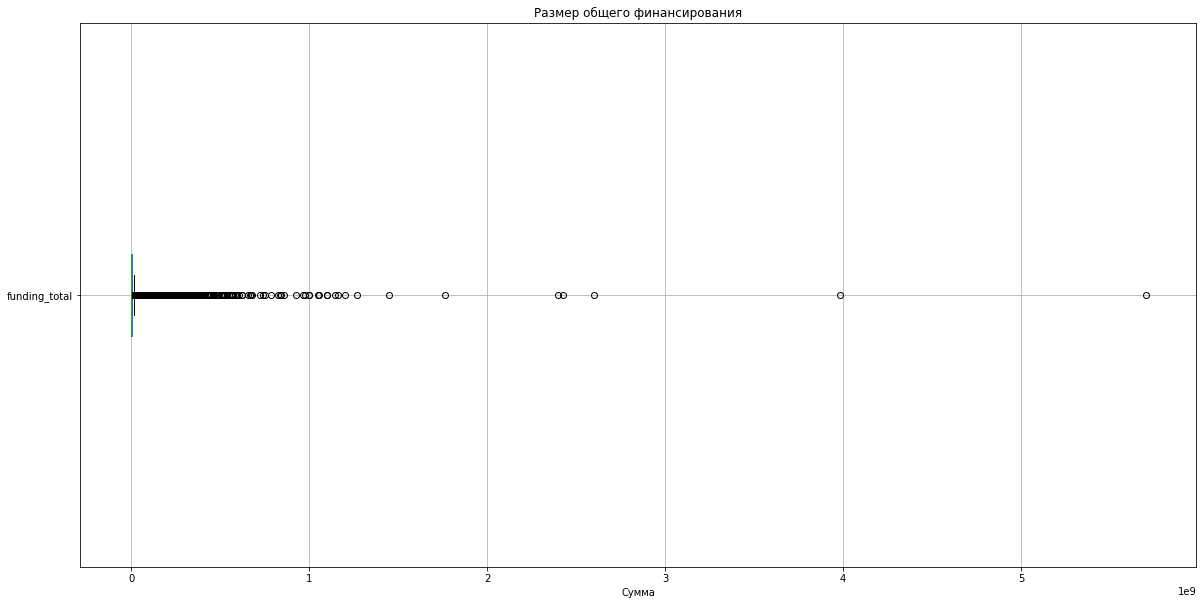

In [95]:
# Строим диаграмму размаха методом boxplot()
boxplot = companies_2_df.boxplot(column='funding_total',
                     vert=False, 
                     figsize=(20, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Размер общего финансирования')
boxplot.set_xlabel('Сумма')

plt.show()

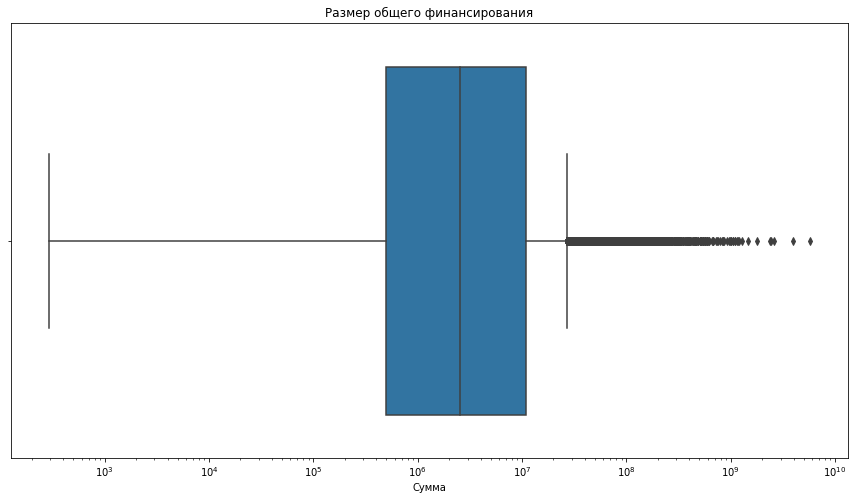

In [96]:
#Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))


sns.boxplot( data=companies_2_df[(companies_2_df['funding_total'] > 0)], x='funding_total')
plt.xscale('log')
# Добавляем заголовок и метки оси
plt.title('Размер общего финансирования')
plt.xlabel('Сумма')

# Выводим график
plt.show()


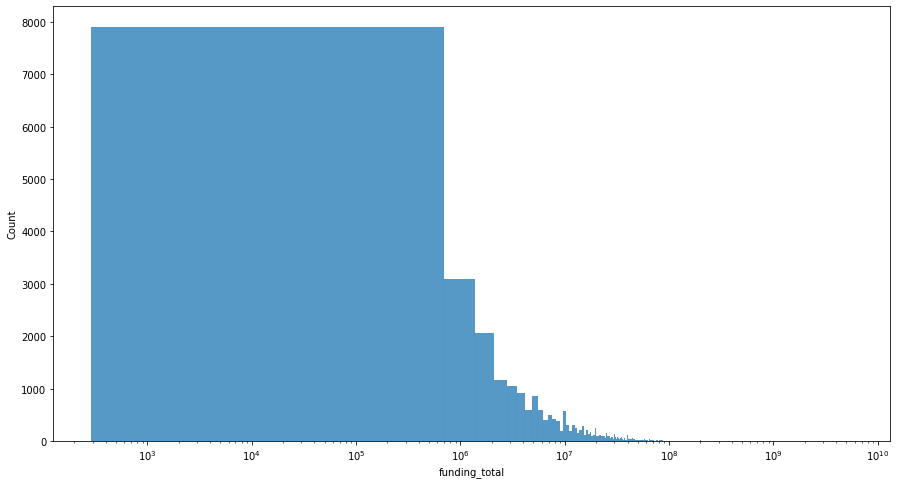

In [97]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))

sns.histplot(data=companies_2_df[(companies_2_df['funding_total'] > 0)], x='funding_total')
plt.xscale('log')
# Выводим график
plt.show()

In [98]:
companies_2_df['funding_total'][(companies_2_df['funding_total'] > 0)].describe()

count          27,874.000
mean       14,816,520.265
std        67,759,363.125
min               291.000
25%           500,000.000
50%         2,564,500.000
75%        11,000,000.000
max     5,700,000,000.000
Name: funding_total, dtype: float64

In [99]:
companies_2_df['funding_total'].describe()

count          40,747.000
mean       10,135,609.637
std        56,464,359.977
min                 0.000
25%                 0.000
50%           600,000.000
75%         5,650,650.000
max     5,700,000,000.000
Name: funding_total, dtype: float64

Для отображения информации на графиках пришлось использовать логарифмическую шкалу plt.xscale('log') иначе как на первом графике ничего не видно. Итак типичный размер выделяемых средств при значениях funding_total больше 0 (нулевые не учитываем) равен 2,564,500, емли учитывать все значения в столбце funding_total то типичным значением будет 600,000. Не типичными значениями являютсе все те которые выше  11,000,000 и ниже 500,000. Максимальный размер выделяемых средств составил 5,700,000,000, минимальный 291 (без учёта нулевых значений). Среденее значение составило 14,816,520.265 (без учёта нудевых значений) с их учётом в целом по столбцу 10,135,609.637. Стандартное отклонение составляет 67,759,363.125. Судя по графику у нас левосимметричное распределение данных, в принципе это видно исходя из значений медианы 2,564,500.000 и среднего значения 14,816,520.265, они очень сильно отличаются.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [100]:
display(acquisition_df)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,нет данных,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,нет данных,0,2013-12-09
9404,10527,223792,220208,нет данных,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12


Информация со стоимостью покупки находится в столбце price_amount датасета acquisition_df. Соответственно данный датасет нужно объединить с companies_2_df(т.к. там находится нужный нам столбец funding_total). Объединять будем по company_id, для это используя метод rename_map переименуем столбец с идентификатором покупающей компании в company_id. Присоединять будем всё ко всему (используя аналог full join), чтобы никакие данные не были потеряны.

In [101]:
rename_map = {'acquiring_company_id' : 'company_id'}
acquisition_df.rename(columns=rename_map, inplace=True) 

In [102]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9407 non-null   int64         
 1   company_id           9407 non-null   int64         
 2   acquired_company_id  9407 non-null   int64         
 3   term_code            9407 non-null   object        
 4   price_amount         9407 non-null   int64         
 5   acquired_at          9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [103]:
companies_3_df = companies_2_df.merge(acquisition_df, on='company_id', how='outer')

In [104]:
companies_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48088 entries, 0 to 48087
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           48088 non-null  int64         
 1   name                 44161 non-null  object        
 2   category_code        44161 non-null  object        
 3   status               44161 non-null  object        
 4   founded_at           30834 non-null  datetime64[ns]
 5   closed_at            2143 non-null   datetime64[ns]
 6   domain               44161 non-null  object        
 7   network_username     44161 non-null  object        
 8   country_code         44161 non-null  object        
 9   investment_rounds    44161 non-null  float64       
 10  funding_rounds       44161 non-null  float64       
 11  funding_total        44161 non-null  float64       
 12  milestones           44161 non-null  float64       
 13  id                   9407 non-n

In [105]:
zero_one_price = companies_3_df[(companies_3_df['price_amount'].isin([0,1]))&(companies_3_df['funding_total']>0)&(companies_3_df['status']=='acquired')]
display(zero_one_price)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquired_company_id,term_code,price_amount,acquired_at
100,10176,Yammer,enterprise,acquired,2008-09-10,NaT,yammer.com,yammer,USA,0.000,5.000,"142,000,000.000",3.000,"6,978.000","25,170.000",нет данных,0.000,2012-04-11
116,10199,Where I've Been,travel,acquired,2007-06-08,NaT,whereivebeen.com,whereivebeen,USA,0.000,2.000,"1,750,000.000",2.000,515.000,"10,198.000",cash,0.000,2008-03-29
149,10253,iWeb Technologies,network_hosting,acquired,1996-10-01,NaT,iweb.com,iweb,CAN,0.000,6.000,"33,522,000.000",0.000,"1,307.000","25,797.000",нет данных,0.000,2009-06-23
319,1053,Uptake,web,acquired,2008-01-01,NaT,uptake.com,uptake,USA,0.000,3.000,"14,000,000.000",4.000,"4,035.000","9,437.000",нет данных,0.000,2010-11-04
359,10581,Lolapps,web,acquired,2008-01-01,NaT,lolapps.com,lolapps,USA,0.000,1.000,"4,000,000.000",3.000,"2,538.000","28,722.000",нет данных,0.000,2009-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43979,9780,NitroSecurity,security,acquired,1999-01-01,NaT,nitrosecurity.com,нет данных,USA,0.000,4.000,"24,500,000.000",2.000,"1,333.000","20,055.000",нет данных,0.000,2009-03-18
43980,9780,NitroSecurity,security,acquired,1999-01-01,NaT,nitrosecurity.com,нет данных,USA,0.000,4.000,"24,500,000.000",2.000,"1,820.000","28,783.000",нет данных,0.000,2008-07-15
43981,9780,NitroSecurity,security,acquired,1999-01-01,NaT,nitrosecurity.com,нет данных,USA,0.000,4.000,"24,500,000.000",2.000,"3,900.000","58,749.000",нет данных,0.000,2010-10-11
44036,99,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.000,2.000,"3,900,000.000",0.000,"1,062.000","1,475.000",cash_and_stock,0.000,2008-10-01


In [106]:
#Топ 5 по категориям
category_code_top = zero_one_price.groupby('category_code')['company_id'].count().sort_values(ascending=False)
display(category_code_top.head())

category_code
software       55
web            46
enterprise     35
games_video    32
mobile         21
Name: company_id, dtype: int64

Больше всего компаний продано за 1 или 0 долларов из категории software, далее web  и enterprise. Как мне кажется фактически данные стартапы не проданы, а подарены, либо данные не полные

In [107]:
zero_one_price['funding_total'].describe()

count             304.000
mean       78,966,451.158
std       341,449,036.771
min            10,000.000
25%         8,750,000.000
50%        22,850,000.000
75%        51,475,000.000
max     5,700,000,000.000
Name: funding_total, dtype: float64

IQR= 51,475,000.000-8,750,000.000 = 42,725,000.000
Нижний порог = 8,750,000.000 – 1.5 * 42,725,000.000 =  55,337,500.000
Верхний порог = 51,475,000.000 + 1.5 * 42,725,000.000 = 115,565,500.000

In [108]:
recency_quantiles = zero_one_price['funding_total'].quantile([78/100, 88.23/100])
display(recency_quantiles)

0.780    55,613,088.000
0.882   115,558,850.000
Name: funding_total, dtype: float64

Для рассчёта верхней и нижней границы выбросов для столбца funding_total используем describe(), как видим нижняя граница выброса соответствует 78% и равна 55,337,500.000, медианное значение 22,850,000.000, верхняя граница выброса 88% равна 115,565,500.000.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [109]:
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].sum().sort_values(ascending=False)
display(category_code_top_price.head())

category_code
mobile       147,471,697,000.000
biotech      120,834,720,000.000
web          108,060,595,000.000
software      69,130,846,858.000
enterprise    62,872,371,000.000
Name: price_amount, dtype: float64

In [110]:
# Топ медианых цен
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].median().sort_values(ascending=False)
display(category_code_top_price.head())

category_code
transportation    643,000,000.000
biotech           334,000,000.000
cleantech         265,000,000.000
health            260,000,000.000
network_hosting   181,500,000.000
Name: price_amount, dtype: float64

In [111]:
# Топ стандартного отклонения
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].std().sort_values(ascending=False)
display(category_code_top_price.head())

category_code
mobile    8,178,944,311.625
finance   7,476,401,541.409
other     2,957,765,717.166
biotech   2,411,252,043.982
search    1,748,839,340.852
Name: price_amount, dtype: float64

Среди категорий стартапов можно выделить с наибольшими ценами transportation(643,000,000.000), biotech(334,000,000.000)  cleantech (265,000,000.000). Наибольший разброс цен имеют категории так же mobile(8,178,944,311.625), finance(7,476,401,541.409) и other(2,957,765,717.166). 


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [112]:
# Оставляем те компании, которые в принципе проходили процесс финансирования по раундам
companies_4_df=companies_3_df[(companies_3_df['funding_rounds']>0)]
display(companies_4_df)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquired_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.000,3.000,"39,750,000.000",5.000,NaN,NaN,NaN,NaN,NaT
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.000,1.000,"5,000,000.000",3.000,NaN,NaN,NaN,NaN,NaT
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.000,1.000,0.000,4.000,"3,727.000","31,658.000",нет данных,0.000,2010-03-01
5,10015,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.000,5.000,"68,069,200.000",0.000,NaN,NaN,NaN,NaN,NaT
6,100155,MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,нет данных,USA,0.000,3.000,"10,125,300.000",1.000,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44156,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.000,1.000,"10,000,000.000",0.000,NaN,NaN,NaN,NaN,NaT
44157,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.000,1.000,"500,000.000",1.000,NaN,NaN,NaN,NaN,NaT
44158,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.000,4.000,"44,000,000.000",6.000,NaN,NaN,NaN,NaN,NaT
44159,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.000,1.000,"1,300,000.000",3.000,NaN,NaN,NaN,NaN,NaT


In [113]:
companies_4_df['funding_rounds'].describe()

count   33,687.000
mean         1.724
std          1.342
min          1.000
25%          1.000
50%          1.000
75%          2.000
max         15.000
Name: funding_rounds, dtype: float64

In [114]:
category_status_funding_rounds = companies_4_df.groupby('status')['funding_rounds'].describe()
display(category_status_funding_rounds)

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,"2,784.000",1.939,1.327,1.000,1.000,1.000,2.000,12.000
closed,"2,104.000",1.381,0.832,1.000,1.000,1.000,1.000,8.000
ipo,"1,603.000",2.644,2.605,1.000,1.000,2.000,3.000,13.000
operating,"27,196.000",1.675,1.238,1.000,1.000,1.000,2.000,15.000


In [115]:
companies_4_df.groupby('status')['funding_rounds'].mean()

status
acquired    1.939
closed      1.381
ipo         2.644
operating   1.675
Name: funding_rounds, dtype: float64

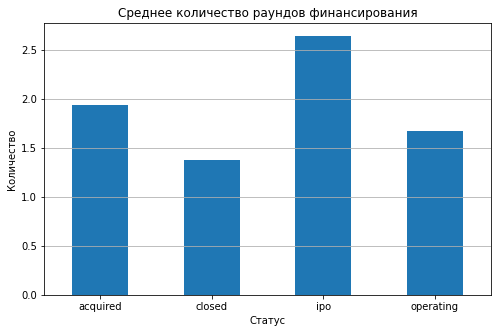

In [116]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
companies_4_df.groupby('status')['funding_rounds'].mean().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Среднее количество раундов финансирования'
)

# Настраиваем оформление графика
plt.xlabel('Статус')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

Итак средние значения количества раундов финансирования по статусам стартапов распределились следующим образом acquired= 1.939, closed=1.381, ipo=2.644, operating=1.675 Медианное значение по столбцу 'funding_rounds' = 1, а среднее значение = 1.724. Разница между средним и медианным значением не очень большая, это говорит о небольшом разбросе значений. Максимальное количество раундов составляло 15 


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

1. В ходе исследования были проанализированы данные более 200 000 тысяч стартапов (итговый датасет попрядка 40 000 стартапов), сотрудников данных стартапов их образования, а так же данные связанные раундами и общим финансированием по данным стартапам. Данные использовались из нескольких датасетов (acquisition, company_and_rounds, education, people, degrees, fund и investment). Данные достаточно объёмные, поэтому ошибки которые были найдены в названиях, типах данных, дубликатах и т.д. не вызвали удивления. Основной акцент анализа был в том чтобы по итогу сформировать компактный и в то же время дающий ответы на все интересующие вопросы заказчика, датасет. 
2. - Итак анализ раундов финансирования по годам показал что наиболее максимальный размер собранных в рамках одного раунда средств был в 2000 году, касательно 2013 года наблюдалось наиболее максимальное количество раундов (11042), а что касается выделяемых в рамках каждого раунда средств составили 8,123,521.669, т.е. в 2013 году наблюдался рост.
 - Люди и их образование. В ходе анализа все компании были поделены на 4 группы, в зависимости от количества сотрудников (микро, маленькие, средние и большие), средняя доля сотрудников без информации об образовании в каждой из групп для микро компаний 51,1%, для маленьких компаний 41,7%, для средних компаний 42,5%, для больших 28,2%. Наблюдается тенденция, чем крупнее стартап тем меньше отсутствия информации об образовании, возможно в крупных стартапах более жёсткие требования к образованию.
 -  Объединять или не объединять — вот в чём вопрос. Датасеты people_df и fund_df можно объединить так как подсчитано что количество дубликатов составляет 80, в процентном соотношении количество дубликатов составляе менее 1 % и равно 0,04%. Можно сделать вывод что доля дубликатов незначительная. Объединение можно провести по столбцу network_username.
 - После обработки по заданным параметрам датасета company_and_rounds.csv в итоговом датасете companies у нас осталось порядка 40 000 компаний, с данным датасетом в дальнейшем и была продолжена работа.
 - Анализ выбросов. Типичный размер выделяемых средств при значениях funding_total больше 0 (нулевые не учитываем) равен 2,564,500, емли учитывать все значения в столбце funding_total то типичным значением будет 600,000. Не типичными значениями являютсе все те которые выше 11,000,000 и ниже 500,000. Максимальный размер выделяемых средств составил 5,700,000,000, минимальный 291 (без учёта нулевых значений). Среденее значение составило 14,816,520.265 (без учёта нудевых значений) с их учётом в целом по столбцу 10,135,609.637. Стандартное отклонение составляет 67,759,363.125. Судя по графику у нас левосимметричное распределение данных, в принципе это видно исходя из значений медианы 2,564,500.000 и среднего значения 14,816,520.265, они очень сильно отличаются.
 - Больше всего компаний продано за 1 или 0 долларов из категории software, далее web и enterprise. Как мне кажется фактически данные стартапы не проданы, а подарены, либо данные не полные.Для рассчёта верхней и нижней границы выбросов для столбца funding_total используем describe(), как видим нижняя граница выброса соответствует 78% и равна 55,337,500.000, медианное значение 22,850,000.000, верхняя граница выброса 88% равна 115,565,500.000.
 - Среди категорий стартапов можно выделить с наибольшими ценами transportation(643,000,000.000), biotech(334,000,000.000)  cleantech (265,000,000.000). Наибольший разброс цен имеют категории так же mobile(8,178,944,311.625), finance(7,476,401,541.409) и other(2,957,765,717.166). 
 - Средние значения количества раундов финансирования по статусам стартапов распределились следующим образом acquired= 1.939, closed=1.381, ipo=2.644, operating=1.675 Медианное значение по столбцу 'funding_rounds' = 1, а среднее значение = 1.724. Разница между средним и медианным значением не очень большая, это говорит о небольшом разбросе значений. Максимальное количество раундов составляло 15.
3. Стоит обратить внимание на такие категории стартапов как transportation, biotech (наиболее высокие медианные стоимости стартапов в данных категориях), а так же mobile и финиасовый сектор (в данных категориях наибольший разброс  цен), но не стоит забывать о том что высокий доход сопряжён с высокими рисками. 